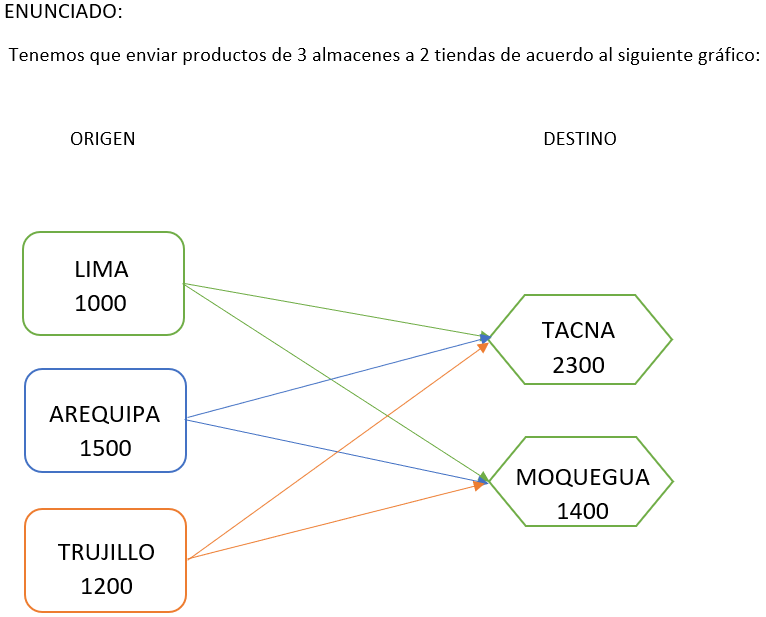

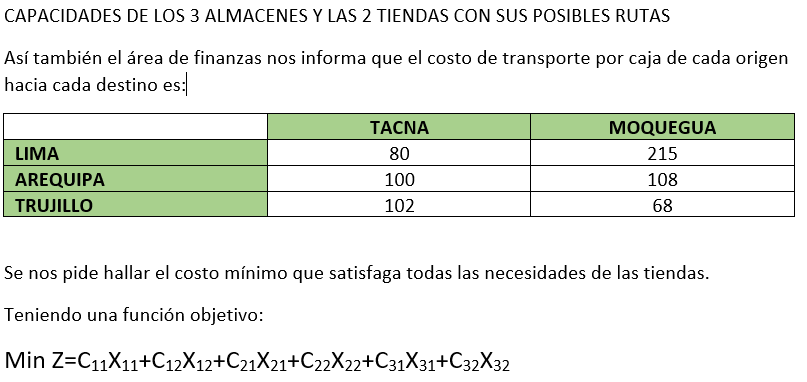

In [ ]:
### Bibliotecas 
# instalar pulp: pip install pulp
import pandas as np
from pulp import *
from pandas import DataFrame

In [2]:
### Ciudades
origen = ['Lima','Arequipa','Trujillo']
destino = ['Tacna','Moquegua']

In [3]:
oferta = {'Lima': 1000, 'Arequipa' : 1500, 'Trujillo': 1200}
demanda = {'Tacna': 2300, 'Moquegua' : 1400}

In [4]:
costo_envio ={'Lima':{'Tacna': 80, 'Moquegua' : 215},
             'Arequipa':{'Tacna': 100, 'Moquegua' : 108},
             'Trujillo': {'Tacna': 102, 'Moquegua' : 68}}

In [5]:
### Resolviendo el problema
### Declaramos la función objetivo... nota que buscamos minimizar el costo(LpMinimize)
prob = LpProblem('Transporte', LpMinimize)

In [6]:
rutas = [(i,j) for i in origen for j in destino]

In [7]:
cantidad = LpVariable.dicts('Cantidad de Envio',(origen,destino),0)

In [8]:
prob += lpSum(cantidad[i][j]*costo_envio[i][j] for (i,j) in rutas)

In [9]:
for j in destino:
    prob += lpSum(cantidad[i][j] for i in origen) == demanda[j]

In [10]:
for i in origen:
    prob += lpSum(cantidad[i][j] for j in destino) <= oferta[i]

In [11]:
### Resolvemos e imprimimos el Status, si es Optimo, el problema tiene solución.
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [12]:

### Imprimimos la solución
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)
print('El costo mínimo es:', value(prob.objective))

Cantidad_de_Envio_Arequipa_Moquegua = 200.0
Cantidad_de_Envio_Arequipa_Tacna = 1300.0
Cantidad_de_Envio_Lima_Tacna = 1000.0
Cantidad_de_Envio_Trujillo_Moquegua = 1200.0
El costo mínimo es: 313200.0
